<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression

_Authors: Kevin Markham (Washington, D.C.), Ed Podojil (New York City)_

#### Learning Objectives
- Define data modeling and simple linear regression.
- Build a linear regression model using a data set that meets the linearity assumption using the scikit-learn library.
- Understand and identify multicollinearity in a multiple regression.

# Section 1: Linear Regression

## Demonstration with random data

In [1]:
# Build a pandas dataframe which contains 50 random data points, 'x' and 'y'
import pandas as pd
from random import randint

x=[randint(0,30) for i in range(0,50)]
y=[randint(0,30) for i in range(10,60)]
    
df=pd.DataFrame({'x':x,'y':y})
df.head()

,x,y
0,1,8
1,30,11
2,18,4
3,6,23
4,27,18


We now have a set of predictor (x) and target (y) variables, but should we expect a relationship?

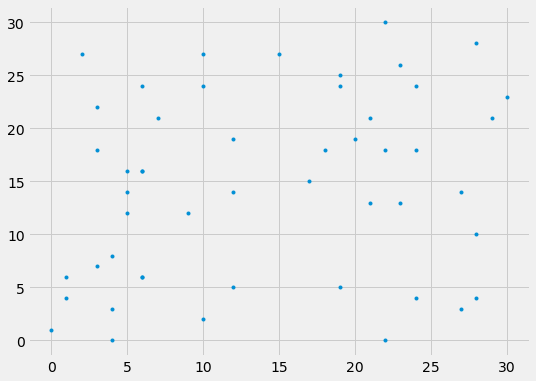

In [4]:
import matplotlib.pyplot as plt

plt.plot(df.x,df.y,'.');

Let's now build our linear model, to do this we will need to tell Python what our array of features are and our target variable as a series

In [5]:
X=df[['x']] #Array of features
y=df.y #Target series

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr=LinearRegression() #Instantiate the model
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
lr.fit(X,y) #Fit the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now we have a fitted model we can evaluate the intercept and coefficient and use it to predict future values. We can also calculate the r-squared value to help us assess how good the model is for predicting

In [9]:
print('Intercept: ' + str(lr.intercept_))
print('Coefficient: ' + str(lr.coef_))

Intercept: 11.706556650791892
Coefficient: [0.21035921]


In [10]:
new_values=[[2],[13],[10]] 
lr.predict(new_values)

array([12.12727508, 14.44122642, 13.81014878])

How good is the model for predicting? 

In [11]:
lr.score(X,y)

0.05137127927704577

## Exercise

<a id="introduce-the-bikeshare-dataset"></a>
## Bikeshare Data Set
---

We'll be working with a data set from Capital Bikeshare that was used in a Kaggle competition ([data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)).

The objective of the competition is to predict total ridership of Capital Bikeshare in any given hour.

Demand forecasting is a common data science application. If we can predict the quantity of demand, total ridership in a given hour, we can create analytical tools to improve the bikeshare system. 
Some applications would be:
* Find where to site new bikeshare stations and know how large of a station to build.
* Calculate the expected wear and tear on bikes and what the replacement costs will be.
* Use a slightly different research design to forecast full and empty stations and send a service vehicle to "rebalance" the bikes from one station to another, as sometimes bikeshare stations have no bikes or are completely full and prevent use of the station.

Businesses aren't new to demand forecasting, but older methods suffered from poor predictions at atypical small locations. Modern approaches incorporate clusters and online data from Twitter and Google Trends to improve prediction in these small locations.

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

<a id="read-in-the--capital-bikeshare-data"></a>
### Read In the Capital Bikeshare Data

In [3]:
# Read the data and set the datetime as the index.
url = './data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

Notice that we used `index_col` to set an index or primary key for our data. In this case, the index of each row will be set to the value of its `datetime` field.

We also ask Pandas to parse dates (if `parse_dates=True`, for the index only). So, rather than reading in a string, Pandas converts the index string to a `datetime` object.

In [13]:
# Preview the first five rows of the DataFrame.
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### What does each observation represent?

In [ ]:
# A:

#### What is the response variable (as defined by Kaggle)?

In [ ]:
# A:

#### How many features are there?

In [ ]:
# A:

'Count' is not a good name for a feature as this is a command in pandas and can be confusing. Use the code below to rename the count column to total

In [4]:
# Use the .rename() method to rename count to total
bikes.rename(columns={'count':'total_rentals'}, inplace=True)

<a id="visualizing-the-data"></a>
### Visualizing the Data

It is important to have a general feeling for what the data looks like before building a model. Ideally, before creating the model you would have some sense of which variables might matter most to predict the response. This dataset is fairly intuitive (and the purpose of this lesson is not visualization), so we will keep the visualization short. 

For your first model you are going to use temperature as your predictor, and total_rentals as your target.

#### Produce a scatter graph of temperature vs total_rentals

In [ ]:
# A:

Click to reveal solution

<span style ='color:white'>
    
# Pandas scatterplot
bikes.plot(kind='scatter', x='temp', y='total_rentals', alpha=0.2);
    
# Seaborn scatterplot with regression line
sns.lmplot(x='temp', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

Next we will begin the process of setting up our linear model, follow the steps below to get your predictor array and target series ready

In [5]:
# Create X and y.
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total_rentals

In [ ]:
# Check X's type.
print((type(X)))
print((type(X.values)))

In [ ]:
# Check y's type.
print((type(y)))
print((type(y.values)))

<a id="scikit-learns--step-modeling-pattern"></a>
## Build the model

In [ ]:
from sklearn.linear_model import LinearRegression

#### Make an instance of a LinearRegression object

Click to reveal solution

<span style ='color:white'>
# Make an instance of a LinearRegression object.
lr = LinearRegression()
type(lr)

In [ ]:
# A:

#### Fit the data to the model

Click to reveal solution

<span style ='color:white'>
lr.fit(X, y)

#### Check the models intercept and coefficient

Click to reveal solution

<span style ='color:white'>
    
# Print the coefficients.
print(lr.intercept_)
print(lr.coef_)

In [ ]:
# A:

<a id="using-the-model-for-prediction"></a>
## Extend: Using the Model for Prediction
---

While plenty of insight can be found in reading coefficients, the most common uses of data science focus on prediction. In scikit-learn we can make predictions from a fitted model using `.predict()`, but we will also go through the calculation by hand to understand it.

#### How many bike rentals would we predict if the temperature was 25 degrees Celsius?

#### Explore the intercept and coefficients of the linear model.

You can search for "sklearn linear regression" and explore the attributes section of the documentation to learn how to do this.

In [ ]:
# Manually calculate the prediction.
# A:

In [ ]:
# Use the predict method.
# A:

Click to reveal solution

<span style ='color:white'>
    
new_value=[[25]]
lr.predict(new_value)

<a id="does-the-scale-of-the-features-matter"></a>
### Does the Scale of the Features Matter?

Let's say that temperature was measured in Fahrenheit, rather than Celsius. How would that affect the model? 

Run the code below to see what happens

In [ ]:
# Create a new column for Fahrenheit temperature.
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

In [ ]:
# Seaborn scatterplot with regression line
sns.lmplot(x='temp_F', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

#### Rebuild the `LinearRegression` from above using the `temp_F` features instead.

In [ ]:
# Create X and y.
feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total_rentals

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

#### Convert 25 degrees Celsius to Fahrenheit.

In [ ]:
25 * 1.8 + 32

#### Predict rentals for 77 degrees Fahrenheit.

In [ ]:
linreg.predict([[77]])

Click to see conclusion

<span style ='color:white'> **Conclusion:** The scale of the features is irrelevant for linear regression models. When changing the scale, we simply change our interpretation of the coefficients.

In [ ]:
# Remove the temp_F column.
bikes.drop('temp_F', axis=1, inplace=True)

<a id="work-with-multiple-features"></a>
## Section 2: Work With Multiple Features
---

We've demonstrated simple linear regression with one feature to gain an intuition, but the benefit of modeling is the ability to reason about hundreds of features at once. There is no limit to the number of features you can use. However, often a small set of features accounts for most of the variance (assuming there is a linear relationship at all). We will start by using four features.

<a id="visualizing-the-data-part-"></a>
### Visualizing the Data (Part 2)

Follow the code below for EDA with multiple features

#### Explore more features.

In [6]:
# Create feature column variables
feature_cols = ['temp', 'season', 'weather', 'humidity']

#### Create a subset of scatterplot matrix using Seaborn.
We can use pairplot with the y_vars argument to only show relationships with the `total_rentals` variable

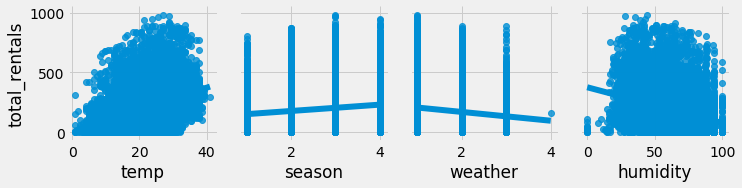

In [17]:
# multiple scatterplots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total_rentals', kind='reg');

#### Are you seeing anything you didn't expect?

#### Explore the season variable using a cross-tab.

In [18]:
# Cross-tabulation of season and month
pd.crosstab(bikes.season, bikes.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


#### Explore the season variable using a box plot.

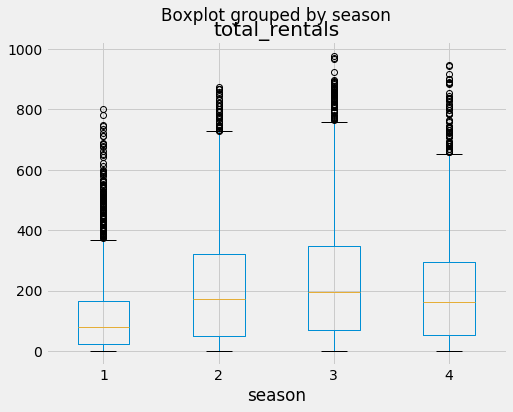

In [19]:
# Box plot of rentals, grouped by season
bikes.boxplot(column='total_rentals', by='season');

#### Look at rentals over time.

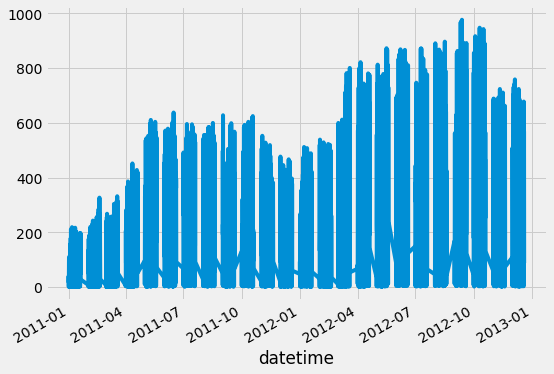

In [20]:
# Line plot of rentals
bikes.total_rentals.plot();

#### What does this tell us?

There are more rentals in the winter than the spring, but only because the system is experiencing overall growth and the winter months happen to come after the spring months.

#### Look at the correlation matrix for the bikes `DataFrame`.

In [21]:
# Correlation matrix (ranges from 1 to -1)
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


#### Use a heat map to make it easier to read the correlation matrix.

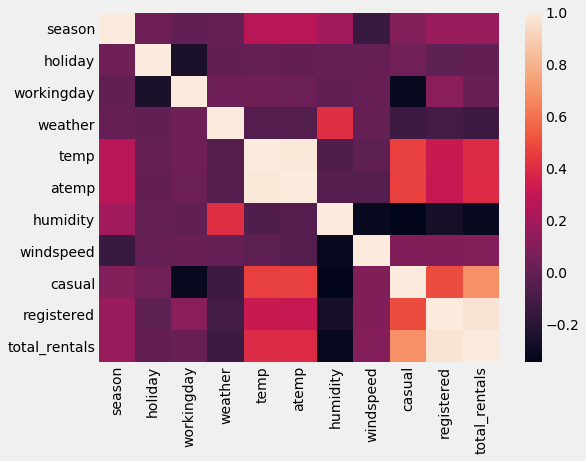

In [22]:
# Visualize correlation matrix in Seaborn using a heat map.
sns.heatmap(bikes.corr())

#### What relationships do you notice?

In [ ]:
# A:

<a id="adding-more-features-to-the-model"></a>
### Adding More Features to the Model

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

- For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

- For a linear regression, we want these variables to be largely independent of one another, but all of them should help explain the y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

#### Create another `LinearRegression` instance that is fit using temp, season, weather, and humidity.

Make sure you call the instance a different name from before

In [ ]:
# A:

Click to reveal solution

<span style ='color:white'>
    
# Create a list of features.
feature_cols = ['temp', 'season', 'weather', 'humidity']

# Create X and y.
X = bikes[feature_cols]
y = bikes.total_rentals

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

#### Display the linear regression coefficient along with the feature names.

In [ ]:
# Pair the feature names with the coefficients.
list(zip(feature_cols, linreg.coef_))

How can we interpret these coefficients? Click below to see the answer

<span style ='color:white'>

Interpreting the coefficients:

- Holding all other features fixed, a 1-unit increase in temperature is associated with a rental increase of 7.86 bikes.
- Holding all other features fixed, a 1-unit increase in season is associated with a rental increase of 22.5 bikes.
- Holding all other features fixed, a 1-unit increase in weather is associated with a rental increase of 6.67 bikes.
- Holding all other features fixed, a 1-unit increase in humidity is associated with a rental decrease of 3.12 bikes.

Does anything look incorrect and does not reflect reality?

<a id="what-is-multicollinearity"></a>
## What Is Multicollinearity?
---

Multicollinearity happens when two or more features are highly correlated with each other. The problem is that due to the high correlation, it's hard to disambiguate which feature has what kind of effect on the outcome. In other words, the features mask each other. 

There is a second related issue called variance inflation where including correlated features increases the variability of our model and p-values by widening the standard errors. This can be measured with the variance inflation factor, which we will not cover here.

#### With the bikeshare data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership.

In [ ]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikes[['temp', 'atemp', 'casual']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

#### Create a linear model that predicts `total_rentals` using `temp` and `atemp`.

In [ ]:
# A:

Click to reveal solution

<span style ='color:white'>

# Create a list of features.
feature_cols = ['temp', 'atemp']

# Create X and y.
X = bikes[feature_cols]
y = bikes.total_rentals

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

#### Go back and remove either `temp` or `atemp` from the feature list. How do the coefficients change? 

In [ ]:
# A:

<a id="how-to-select-a-model"></a>
# Section 3: Model Selection
---

We can make linear models now, but how do we select the best model to use for our applications? We will offer a general procedure and a simple metric that works well in many cases. That said, it's important to keep the business context in mind and know that there are alternative metrics that can work better.

<a id="evaluation-metrics-for-regression-problems"></a>
### Evaluation Metrics for Regression Problems

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. We need evaluation metrics designed for comparing continuous values.

Here are four common evaluation metrics for regression problems:

**R-Squared** is how effective your model is for predicting against just guessing

$$ 1 - \frac {RSS}{TSS} $$

**Mean absolute error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean squared error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root mean squared error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
# Example true and predicted response values
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

#### Calculate MAE, MSE, and RMSE using imports from sklearn metrics and NumPy.

In [ ]:
# Calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(true, pred))
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

Let's compare these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. Also, MSE is continuous and differentiable, making it easier to use than MAE for optimization.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Here's an additional example, to demonstrate how MSE/RMSE punishes larger errors:

In [ ]:
# Same true values as above
true = [10, 7, 5, 5]

# New set of predicted values
pred = [10, 7, 5, 13]

# MAE is the same as before.
print('MAE:', metrics.mean_absolute_error(true, pred))

# MSE and RMSE are larger than before.
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

<a id="comparing-models-with-traintest-split-and-rmse"></a>
### Exercise: Comparing Models 

Using the two models you built earlier, we will now calculate performance metrics to evaluate which is better

#### Using `.predict(X)` create a series of predicted values for both models

In [ ]:
# Single Feature Model
# A:

In [ ]:
# Multiple Features Model
# A:

Click to reveal solution

<span style ='color:white'>
    
predict_single=lr.predict(X)
predict_multiple=linreg.predict(X)

#### Using `.score(X,y)` calculate the r-squared values for both models

In [ ]:
# Single Feature Model
# A:

In [ ]:
# Multiple Features Model
# A:

#### Using your predicted values for each model, calculate the MAE, MSE and RMSE, using `y` as your true values

In [ ]:
# Single Feature Model
# A:

In [ ]:
# Multiple Features Model
# A:

Click to reveal solution

<span style ='color:white'>
    
print('MAE:', metrics.mean_absolute_error(y, predict_single))
print('MSE:', metrics.mean_squared_error(y, predict_single))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predict_single)))
    
print('MAE:', metrics.mean_absolute_error(y, predict_multiple))
print('MSE:', metrics.mean_squared_error(y, predict_multiple))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predict_multiple)))

<a id="feature-engineering-to-improve-performance"></a>
## Feature Engineering to Improve Performance
---

Machine learning models are very powerful, but they cannot automatically handle every aspect of our data. We have to explicitly modify our features to have relationships that our models can understand. In this case, we will need to pull out features to have a linear relationship with our response variable.


<a id="handling-categorical-features"></a>
### Handling Categorical Features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** Transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** Use dummy encoding (0/1). Here, each possible category would become a separate feature.

What are the categorical features in our data set?

- **Ordered categories:** `weather` (already encoded with sensible numeric values)
- **Unordered categories:** `season` (needs dummy encoding), `holiday` (already dummy encoded), `workingday` (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an ordered relationship. Instead, we create multiple dummy variables.

#### Create dummy variables using `get_dummies` from Pandas.

In [ ]:
# A:

Click to reveal solution

<span style ='color:white'>
pd.get_dummies(bikes.season,prefix='Season')

However, we actually only need three dummy variables (not four), and thus we'll drop the first dummy variable.

Why? Because three dummies captures all of the "information" about the season feature, and implicitly defines spring (season 1) as the baseline level.

This circles back to the concept multicollinearity, except instead of one feature being highly correlated to another, the information gained from three features is directly correlated to the fourth.

#### Recreate the dummy variables, this time adding in `drop_first=True`

In [ ]:
# A:

Click to reveal solution

<span style ='color:white'>
    
pd.get_dummies(bikes.season,prefix='Season',drop_first=True)    

In general, if you have a categorical feature with k possible values, you create k-1 dummy variables.

If that's confusing, think about why we only need one dummy variable for `holiday`, not two dummy variables (`holiday_yes` and `holiday_no`).

#### Create a new dataframe `bikes_dummies` which has the season feature in dummy variables

Click to reveal solution

<span style ='color:white'>
bikes_dummies = pd.get_dummies(bikes,columns=['season'],drop_first=True)

In [ ]:
# A:

#### Rerun the linear regression with dummy variables included.

In [ ]:
# A:

Click to reveal solution

<span style ='color:white'>

# Include dummy variables for season in the model.
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes_dummies[feature_cols]
y = bikes_dummies.total_rentals

linreg_dummy = LinearRegression()
linreg_dummy.fit(X, y)

list(zip(feature_cols, linreg_dummy.coef_))

#### How do we interpret the season coefficients?

Click to reveal solution

<span style ='color:white'>

They are measured against the baseline (spring):

- Holding all other features fixed, summer is associated with a rental decrease of 3.39 bikes compared to the spring.
- Holding all other features fixed, fall is associated with a rental decrease of 41.7 bikes compared to the spring.
- Holding all other features fixed, winter is associated with a rental increase of 64.4 bikes compared to the spring.

Would it matter if we changed which season was defined as the baseline?

- No, it would simply change our interpretation of the coefficients.

In most situations, it is best to have the dummy that is your baseline be the category that has the largest representation.

**Important:** Dummy encoding is relevant for all machine learning models, not just linear regression models.

#### Calculate performance metrics to assess how this model compares to those made previously

In [ ]:
# A

Click to reveal solution

<span style ='color:white'>

#Predicted values
predict_dummy=linreg_dummy.predict(X)

#R-squared
linreg_dummy.score(X,y)

print('MAE:', metrics.mean_absolute_error(y, predict_dummy))
print('MSE:', metrics.mean_squared_error(y, predict_dummy))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predict_dummy)))

<a id="feature-engineering"></a>
### Datetime

See if you can create the following features:

- **hour:** as a single numeric feature (0 through 23)
- **hour:** as a categorical feature (use 23 dummy variables)
- **daytime:** as a single categorical feature (daytime=1 from 7 a.m. to 8 p.m., and daytime=0 otherwise)



#### Extract hour of the day to use as a feature.

In [ ]:
# A:

Click to reveal solution

<span style ='color:white'>

bikes['hour']=pd.DatetimeIndex(bikes.index).hour
bikes.head()

#### Encode `hour` as a categorical feature.

In [ ]:
# A:

Click to reveal solution

<span style ='color:white'>

bikes_hour_dummy=pd.get_dummies(bikes,columns=['hour'],drop_first=True)
bikes_hour_dummy.head()

#### Generate a `daytime` variable based on hour of the day.

In [ ]:
# A:

Click to reveal solution

<span style ='color:white'>

bikes['daytime']=bikes.hour.apply(lambda x: 1 if x >=7 and x <=20 else 0)
bikes.head()

#### Build three linear regression models, each using a different encoding of `hours` to predict `total_rentals`. Which one performs best?

In [ ]:
# A:

Click to reveal solution

<span style ='color:white'>

# hours as feature
X_1=bikes[['hour']]
y=bikes.total_rentals

lr_h1=LinearRegression().fit(X_1,y)
predict_h1=lr_h1.predict(X_1)

print('RMSE (hour as feature): ' + str(np.sqrt(metrics.mean_squared_error(y,predict_h1))))

# hours as categorical
X_2=bikes_hour_dummy.loc[:,'hour_1':'hour_23']


lr_h2=LinearRegression().fit(X_2,y)
predict_h2=lr_h2.predict(X_2)

print('RMSE (hour as categorical): ' + str(np.sqrt(metrics.mean_squared_error(y,predict_h2))))

# hours as daytime
X_3=bikes[['daytime']]


lr_h3=LinearRegression().fit(X_3,y)
predict_h3=lr_h3.predict(X_3)

print('RMSE (hour as daytime): ' + str(np.sqrt(metrics.mean_squared_error(y,predict_h3))))

<a id="bonus-material-regularization"></a>
# Section 4: Optimisation
---

To help our models become more efficient, a common strategy is to scale our features. There are several methods of doing this, but the one we will focus on is StandardScaler. 

## StandardScaler

Run the code below to see how we can StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
#Recall bikes dataset
bikes.head()

We wouldn't usually standardise the target variable, so we will remove it before the next stage

In [ ]:
bikes_predict=bikes.drop('total_rentals',axis=1)

In [ ]:
#Standardise the bikes dataset and compare
bikes_standard=scaler.fit_transform(bikes_predict)

bikes_standard_df=pd.DataFrame(bikes_standard,columns=bikes_predict.columns,index=bikes.index)
bikes_standard_df.head()

#### Build a linear regression model using the standardised data and the same features from before and calculate performance metrics

In [ ]:
# Create predictor array and target series
feature_cols=['season','temp','weather','humidity']
X=bikes_standard_df[feature_cols]
y=bikes.total_rentals

In [ ]:
# A:

Click to reveal solution

<span style ='color:white'>

lr_standard=LinearRegression().fit(X,y)

lr_standard.score(X,y)

#predicted values
predict_standard=lr_standard.predict(X)

print('MAE:', metrics.mean_absolute_error(y, predict_standard))
print('MSE:', metrics.mean_squared_error(y, predict_standard))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predict_standard)))

## Regularization

- Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them toward zero.
- It reduces model variance and thus minimizes overfitting.
- If the model is too complex, it tends to reduce variance more than it increases bias, resulting in a model that is more likely to generalize.

Our goal is to locate the optimum model complexity, and thus regularization is useful when we believe our model is too complex.

<a id="advice-for-applying-regularization"></a>
### Advice for Applying Regularization

**Should features be standardized?**

- Yes, because otherwise, features would be penalized simply because of their scale.
- Also, standardizing avoids penalizing the intercept, which wouldn't make intuitive sense.

**How should you choose between lasso regression and ridge regression?**

- Lasso regression is preferred if we believe many features are irrelevant or if we prefer a sparse model.
- Ridge can work particularly well if there is a high degree of multicollinearity in your model.
- If model performance is your primary concern, it is best to try both.
- Elastic net regression is a combination of lasso regression and ridge Regression.

<a id="ridge-regression"></a>
### Ridge Regression

- [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) documentation
- **alpha:** must be positive, increase for more regularization
- **normalize:** scales the features (without using StandardScaler)

In [ ]:
X=bikes[feature_cols]
y=bikes.total_rentals

In [ ]:
# alpha=0 is equivalent to linear regression.
from sklearn.linear_model import Ridge

# Instantiate the model.
#(Alpha of zero has no regularization strength, essentially a basic linear regression.)
ridgereg = Ridge(alpha=0, normalize=True)

# Fit the model.
ridgereg.fit(X, y)

# Predict with fitted model.
y_pred = ridgereg.predict(X)
print(np.sqrt(metrics.mean_squared_error(y, y_pred)))

In [ ]:
# Coefficients for a non-regularized linear regression
list(zip(feature_cols, ridgereg.coef_))

To interpret these coefficients we need to convert them back to original units, which is a reason to do normalization by hand. However, in this form the coefficients have a special meaning. The intercept is now the average of our outcome, and the magnitude of each coefficient in the model is a measure of how important it is in the model. We call this feature importance.

In [ ]:
# Try alpha=0.1.
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X, y)
y_pred = ridgereg.predict(X)
print(np.sqrt(metrics.mean_squared_error(y, y_pred)))

In [ ]:
# Examine the coefficients.
list(zip(feature_cols, ridgereg.coef_))

While the MSE barely improved, we can see there are significant changes in the weight of our coefficients.  Particularly `weather` whose coefficient has greatly decreased toward 0.

Fitting and using a Lasso Regression in scikit-learn is very similar.  

#### Try playing around with alpha (min 0, max 1) to see what effect it has

#### Try building a model using lasso and calculate the RMSE

In [ ]:
from sklearn.linear_model import Lasso
# A:

Click to reveal solution

<span style ='color:white'>

lasso=Lasso().fit(X,y)
y_pred=lasso.predict(X)
print(np.sqrt(metrics.mean_squared_error(y, y_pred)))

# Examine the coefficients.
list(zip(feature_cols, lasso.coef_))

In addition to the typical [lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) and [ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) there is a third type of regression, [Elastic Net](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) which combines the penalties of the ridge and lasso methods.

## Extend: Exploring Pipelines

Pipelines are a useful way of streamlining our code, this is not essential learning, but worth investigating if interested. Run the code below to see how it works

In [15]:
from sklearn.pipeline import Pipeline

In [16]:
# Build Pipeline instance, defining in a list of tuples each step. Note you need to name each step, and define it
pipe=Pipeline([('scaler',StandardScaler()),('model',LinearRegression())])

In [17]:
# Fit our data and evaluate its performance
pipe.fit(X,y)
print(pipe.score(X,y))

0.15559367802794855


<a id="comparing-linear-regression-with-other-models"></a>
## Comparing Linear Regression With Other Models

Advantages of linear regression:

- Simple to explain.
- Highly interpretable.
- Model training and prediction are fast.
- No tuning is required (excluding regularization).
- Features don't need scaling.
- Can perform well with a small number of observations.
- Well understood.

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response.
- Performance is (generally) not competitive with the best supervised learning methods due to high bias.
- Can't automatically learn feature interactions.